In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
import pandas as pd

In [4]:
file = pd.read_csv("heart.csv")
file.head()
file.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [5]:
x_train = np.array(file.values[:,:-1])
y_train = np.array(file.values[:,-1]).reshape(-1,1).astype(int)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(sum(y_train))

(303, 13)
(303, 1)
[165]


In [7]:
x_neg_0=np.zeros(138)
x_neg=x_train[165:303]
x_pos_0=np.ones(165)
x_pos=x_train[0:165]

In [8]:
x_negt = np.insert(x_neg, 13, x_neg_0, axis=1)
x_post = np.insert(x_pos, 13, x_pos_0, axis=1)

In [9]:
x_train = np.concatenate((x_post, x_negt)).reshape(-1, 14)
print(x_train.shape)

(303, 14)


In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [11]:
print(x_train)

[[ 0.9521966   0.68100522  1.97312292 ... -0.71442887 -2.14887271
   0.91452919]
 [-1.91531289  0.68100522  1.00257707 ... -0.71442887 -0.51292188
   0.91452919]
 [-1.47415758 -1.46841752  0.03203122 ... -0.71442887 -0.51292188
   0.91452919]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ...  1.24459328  1.12302895
  -1.09345881]
 [ 0.29046364  0.68100522 -0.93851463 ...  0.26508221  1.12302895
  -1.09345881]
 [ 0.29046364 -1.46841752  0.03203122 ...  0.26508221 -0.51292188
  -1.09345881]]


In [12]:
x_n=np.concatenate((np.ones(69),np.zeros(69)))
x_test=x_neg
np.random.shuffle(x_test)
x_test=np.insert(x_test, 13, x_n, axis=1).reshape(-1,14)
y_test=y_train[165:303]
x_test=scaler.transform(x_test)

In [13]:
x_train.shape

(303, 14)

In [14]:
y_train.shape

(303, 1)

# Model training

In [15]:
additional_metrics = ['acc']
loss_function = BinaryCrossentropy()
number_of_epochs = 7000
optimizer = Adam()
verbosity_mode = 0
layer_size = 10

In [16]:
model = Sequential()
model.add(Dense(layer_size,input_dim=14,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [19]:
batch_size = len(x_train)

In [20]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

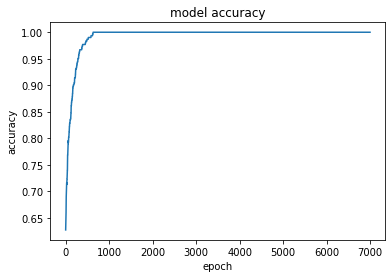

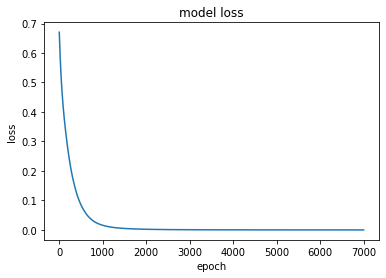

In [21]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

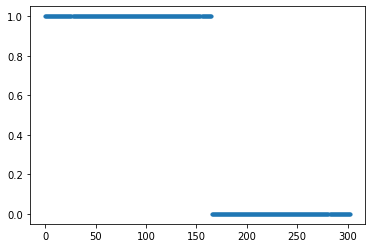

In [22]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

In [23]:
layer_size = 3
number_of_epochs = 2000
model = Sequential()

In [24]:
model.add(Dense(layer_size,input_dim=14,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


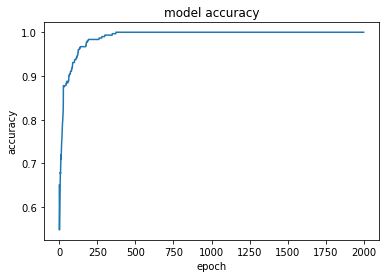

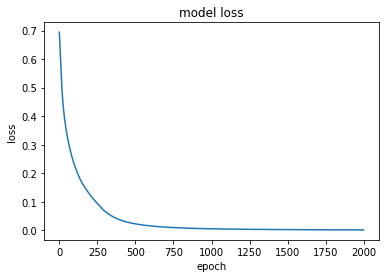

In [25]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=3

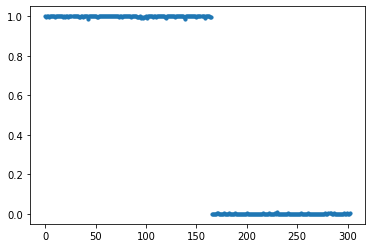

In [26]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

In [27]:
layer_size = 5
number_of_epochs = 2000
model = Sequential()
model.add(Dense(layer_size,input_dim=14,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 75        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


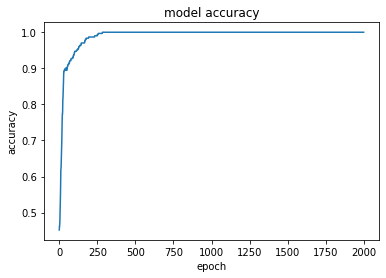

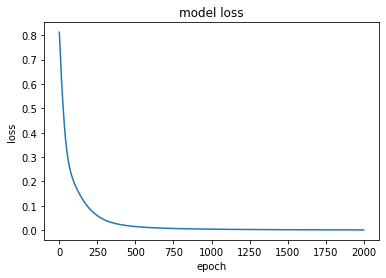

In [28]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=5

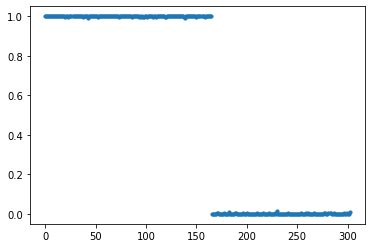

In [29]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

# Bloom Filter

In [30]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(self.model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

    def add_init(self,x_train,y_train):
        pred = self.model.predict(x_train)
        for i in range(len(pred)):
            if(y_train[i]==1):
                result = math.floor(pred[i][0]*(self.size-1))
                self.bit_array[result] = 1
    
    def predict(self,x):
        initpred = self.model.predict(x)
        indexes = []
        for i in range(len(initpred)):
            indexes += [math.floor(initpred[i][0]*(bf.size-1))]
        pred = []
        for i in indexes:
            pred += [self.bit_array[i]]
        return np.array(pred)

#(Input:bloom filter,number array,ratio; Output:(-1) for false negative, otherwise fpr)
def fpr_kraska_hash(bf,x,y):
    pred = bf.predict(x)
    tn, fp, fn, tp = confusion_matrix(y, pred,labels=[False,True]).ravel() 
    return fp/(fp+tn)

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k


def fpr_test(x,bf,y):
    pred=bf.predict(x)
    fp=0
    tn=0
    for i in range(len(pred)):
        if((pred[i]==1)and(y[i]==0)):
            fp+=1
        if((pred[i]==0) and (y[i]==0)):
            tn+=1
        if((pred[i]==0) and (y[i]==1)):
            return -1
    print(fp)
    print(tn)
    return fp/(fp+tn)
#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [31]:
m=30

In [32]:
bf=BloomFilter(m,model)

In [33]:
bf.add_init(x_train,y_train)

In [34]:
pred = bf.predict(x_train)
tn, fp, fn, tp = confusion_matrix(y_train, pred,labels=[False,True]).ravel() # ravel opens up the 2x2 matrix
print(tn)
print(tp)
print(fp)
print(fn)

138
165
0
0


In [35]:
print(fpr_kraska_hash(bf,x_train,y_train))

0.0


In [36]:
print(fpr_kraska_hash(bf,x_test,y_test))

0.38405797101449274
